# 0 - Package Import #

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - Dataset Import #

In [2]:
df = pd.read_csv("../datasets/kamyr-digester.csv")
df.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      301 non-null    object 
 1   Y-Kappa          301 non-null    float64
 2   ChipRate         297 non-null    float64
 3   BF-CMratio       287 non-null    float64
 4   BlowFlow         288 non-null    float64
 5   ChipLevel4       300 non-null    float64
 6   T-upperExt-2     300 non-null    float64
 7   T-lowerExt-2     300 non-null    float64
 8   UCZAA            277 non-null    float64
 9   WhiteFlow-4      300 non-null    float64
 10  AAWhiteSt-4      160 non-null    float64
 11  AA-Wood-4        300 non-null    float64
 12  ChipMoisture-4   300 non-null    float64
 13  SteamFlow-4      300 non-null    float64
 14  Lower-HeatT-3    300 non-null    float64
 15  Upper-HeatT-3    300 non-null    float64
 16  ChipMass-4       300 non-null    float64
 17  WeakLiquorF     

# 2 - Drop missing values #

In [4]:
def drop_na_5percent(df):
    print(len(df))
    threshold = len(df) * 0.05
    cols_to_drop_on = df.columns[df.isna().sum() <= threshold]
    df.dropna(subset = cols_to_drop_on, inplace = True)
    print(len(df))
    return df

In [5]:
df_s = drop_na_5percent(df)

301
283


In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 297
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      283 non-null    object 
 1   Y-Kappa          283 non-null    float64
 2   ChipRate         283 non-null    float64
 3   BF-CMratio       283 non-null    float64
 4   BlowFlow         283 non-null    float64
 5   ChipLevel4       283 non-null    float64
 6   T-upperExt-2     283 non-null    float64
 7   T-lowerExt-2     283 non-null    float64
 8   UCZAA            263 non-null    float64
 9   WhiteFlow-4      283 non-null    float64
 10  AAWhiteSt-4      150 non-null    float64
 11  AA-Wood-4        283 non-null    float64
 12  ChipMoisture-4   283 non-null    float64
 13  SteamFlow-4      283 non-null    float64
 14  Lower-HeatT-3    283 non-null    float64
 15  Upper-HeatT-3    283 non-null    float64
 16  ChipMass-4       283 non-null    float64
 17  WeakLiquorF      283 

# 3 - Investigating the variables that still have missing values # 

## 3.1 - Identifying the variables to study ##

In [36]:
cols_list = df_s.columns[df_s.isna().sum()>0].values.tolist()
print(cols_list)

['UCZAA', 'AAWhiteSt-4 ', 'SulphidityL-4 ']


## 3.2 - Plotting the distributions, mean and median, for imputation ##

In [82]:
def distribution_plot (dataf, list):
    number = len(list)
    y_size = len(list)*8
    f, axes = plt.subplots(number, 2, figsize = (18, y_size))
    sns.set_style("darkgrid")
    #sns.set_palette("tab10")
    i = 0

    
    for var in list:
        sns.histplot(data = dataf, x = var, ax = axes[i,0])
        axes[i][0].axvline(dataf[var].mean(), color = 'red', linestyle = '-')
        axes[i][0].axvline(dataf[var].median(), color = 'orange', linestyle = '--')
        
        sns.boxplot(data = dataf, y = var, ax = axes[i,1])
        axes[i][0].set_title(f"Histogram of {var}", y = 1.03, fontsize = 16)
        axes[i][1].set_title(f"Boxplot of {var}", y = 1.03, fontsize = 16)
        
        i+=1


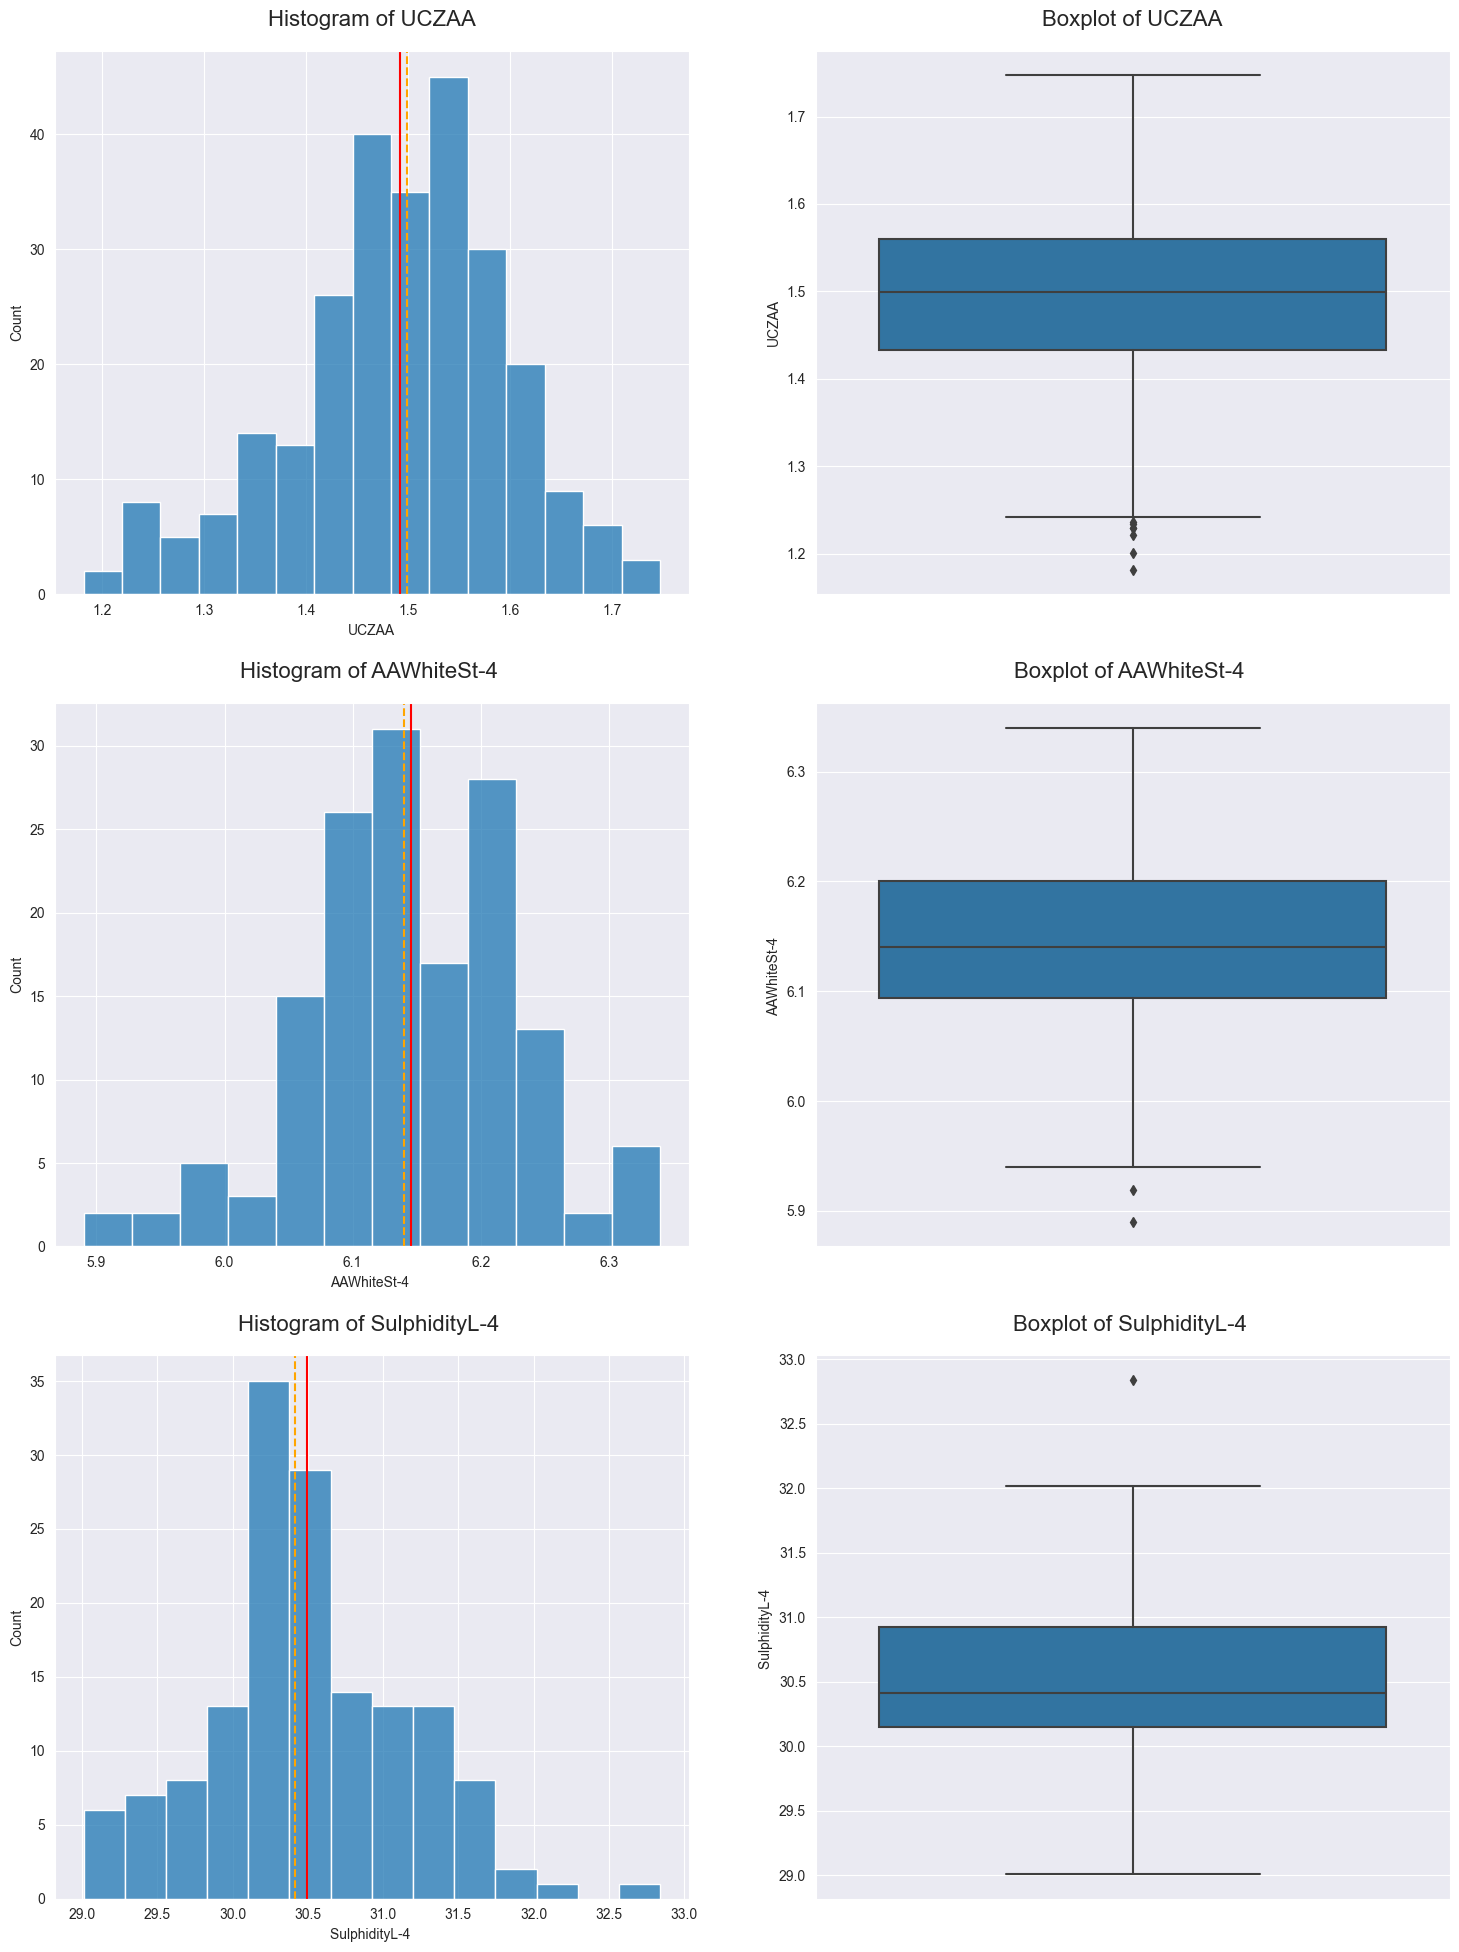

In [83]:
distribution_plot(df_s, cols_list)

## 3.3 - Imputating ##

In [86]:
df_s['UCZAA'] = df_s['UCZAA'].fillna(df_s['UCZAA'].median())
df_s['AAWhiteSt-4 '] = df_s['AAWhiteSt-4 '].fillna(df_s['AAWhiteSt-4 '].mean())
df_s['SulphidityL-4 '] = df_s['SulphidityL-4 '].fillna(df_s['SulphidityL-4 '].mean())

# 4 - Appendix #

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


Text(0.5, 0.98, 'Distribution of UCZAA')

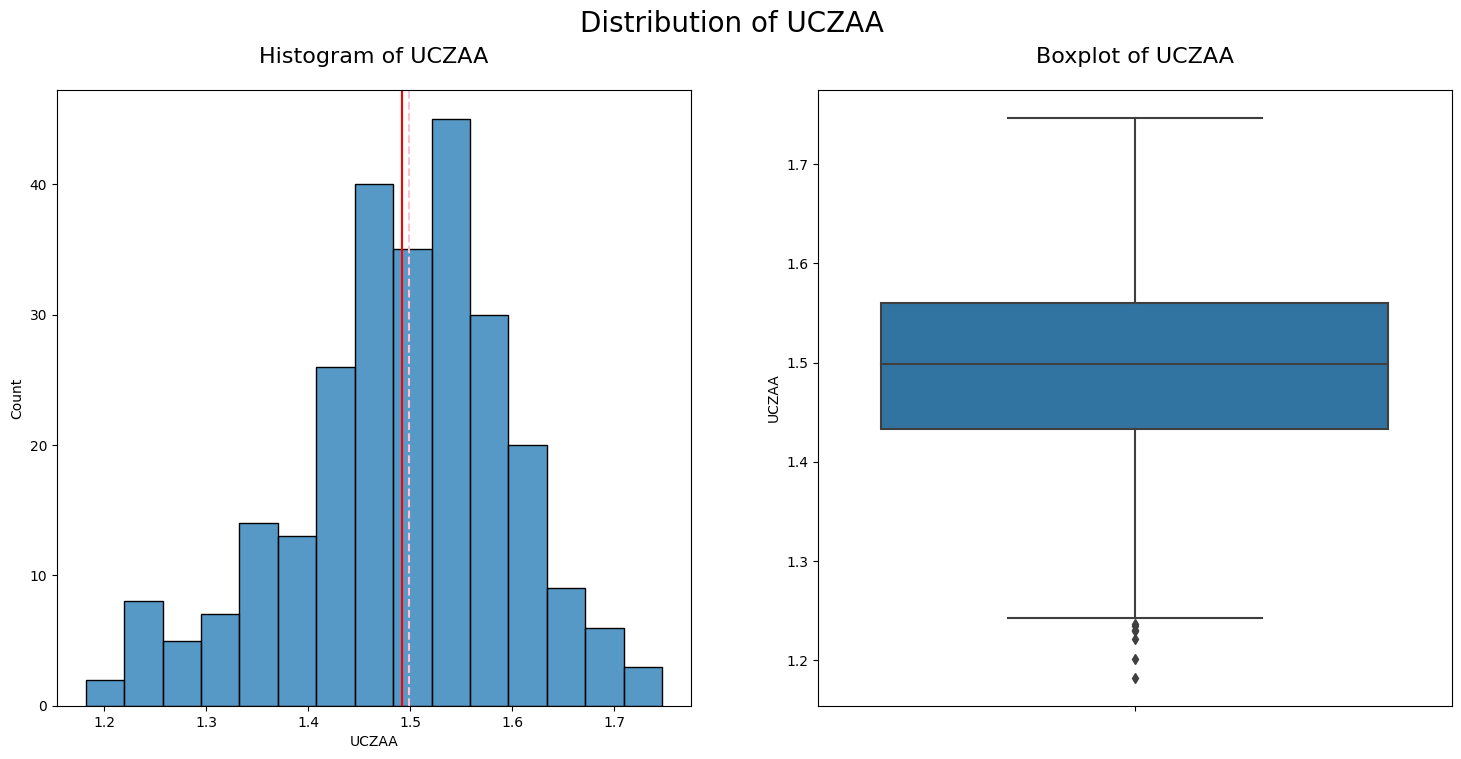

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,8))
sns.set_palette("tab10")
print(type(f))
print(type(axes))

sns.histplot(data = df_s, x = 'UCZAA', ax = axes[0])
f.axes[0].axvline(df_s['UCZAA'].mean(), color = 'red', linestyle = '-')
f.axes[0].axvline(df_s['UCZAA'].median(), color = 'pink', linestyle = '--')

sns.boxplot(data = df_s, y = 'UCZAA', ax = axes[1])
axes[0].set_title("Histogram of UCZAA", y = 1.03, fontsize = 16)
axes[1].set_title("Boxplot of UCZAA", y = 1.03, fontsize = 16)
f.suptitle("Distribution of UCZAA", fontsize = 20)

In [84]:
print(len(df_s.columns))

23


In [ ]:
def multijointplot (dataf, col):
    number = len(df_s.columns) - 1
    y_size = len(list)*8
    f, axes = plt.subplots(number, 2, figsize = (18, y_size))
    sns.set_style("darkgrid")
    #sns.set_palette("tab10")
    i = 0

    
    for var in list:
        sns.histplot(data = dataf, x = var, ax = axes[i,0])
        axes[i][0].axvline(dataf[var].mean(), color = 'red', linestyle = '-')
        axes[i][0].axvline(dataf[var].median(), color = 'orange', linestyle = '--')
        
        sns.boxplot(data = dataf, y = var, ax = axes[i,1])
        axes[i][0].set_title(f"Histogram of {var}", y = 1.03, fontsize = 16)
        axes[i][1].set_title(f"Boxplot of {var}", y = 1.03, fontsize = 16)
        
        i+=1

C:\Users\BenjaminAMSELLEM\AppData\Local\Temp\ipykernel_14864\2570076564.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sns.jointplot(data = df_s, x= col, y = 'SulphidityL-4 ', kind = 'scatter', ax = axes[i])
C:\Users\BenjaminAMSELLEM\AppData\Local\Temp\ipykernel_14864\2570076564.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sns.jointplot(data = df_s, x= col, y = 'SulphidityL-4 ', kind = 'scatter', ax = axes[i])
C:\Users\BenjaminAMSELLEM\AppData\Local\Temp\ipykernel_14864\2570076564.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sns.jointplot(data = df_s, x= col, y = 'SulphidityL-4 ', kind = 'scatter', ax = axes[i])
C:\Users\BenjaminAMSELLEM\AppData\Local\Temp\ipykernel_14864\2570076564.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sns.jointplot(data = df_s, x= col, y = 'SulphidityL-4 ', kind = 'scatter', ax = axes[i])
C:\Users\BenjaminAMSELLEM\AppData\Local\Temp

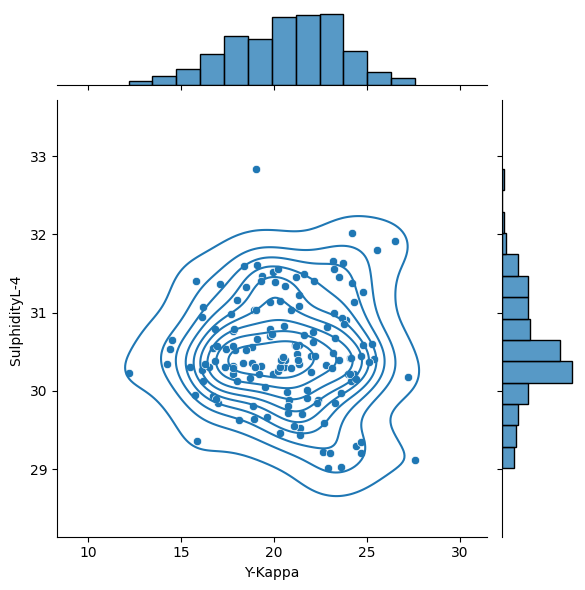

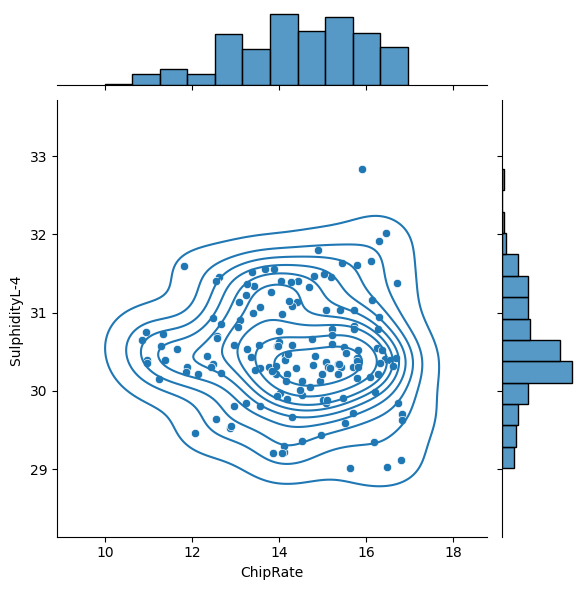

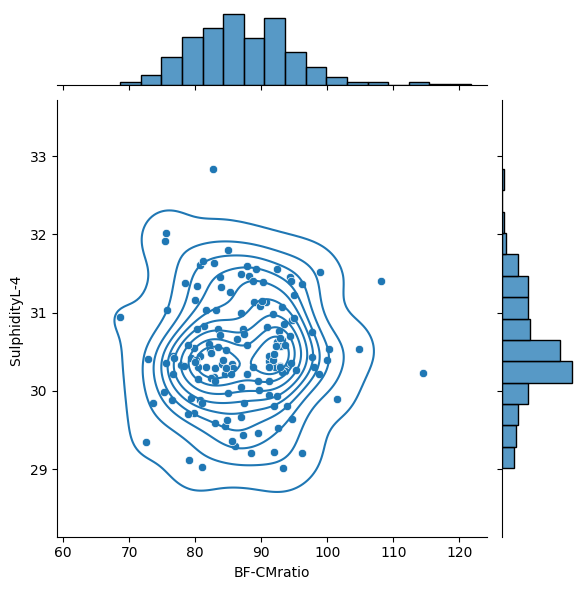

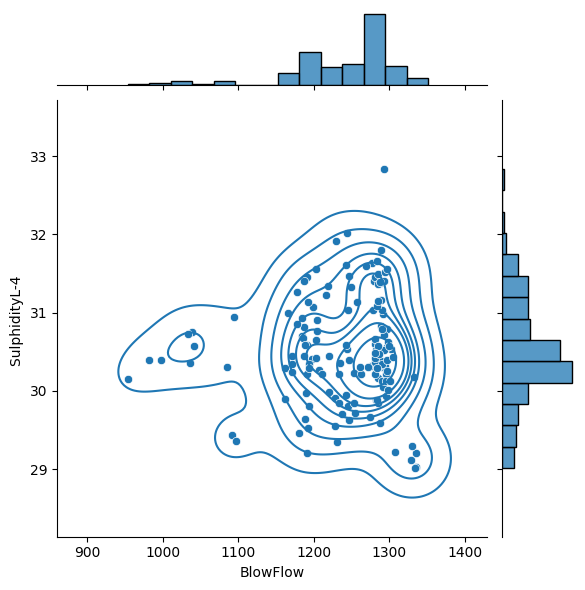

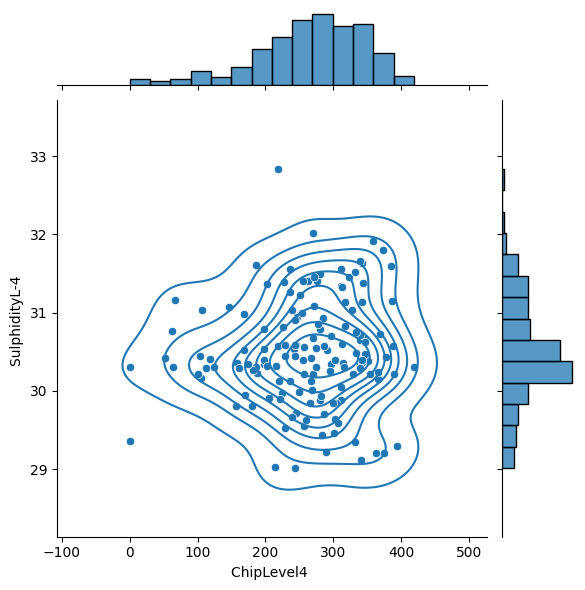

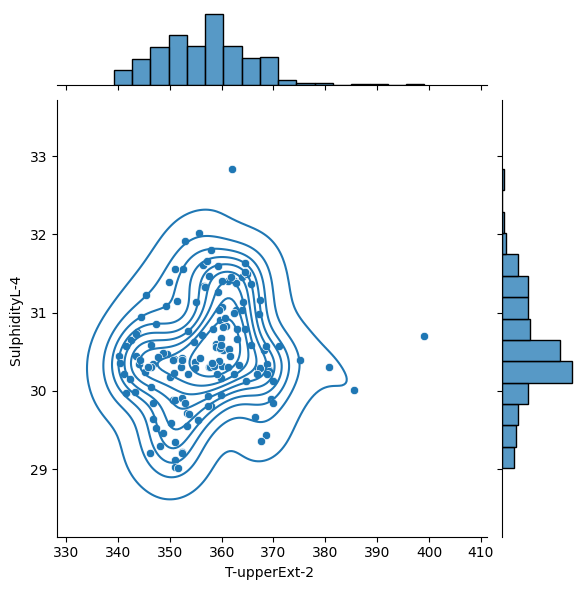

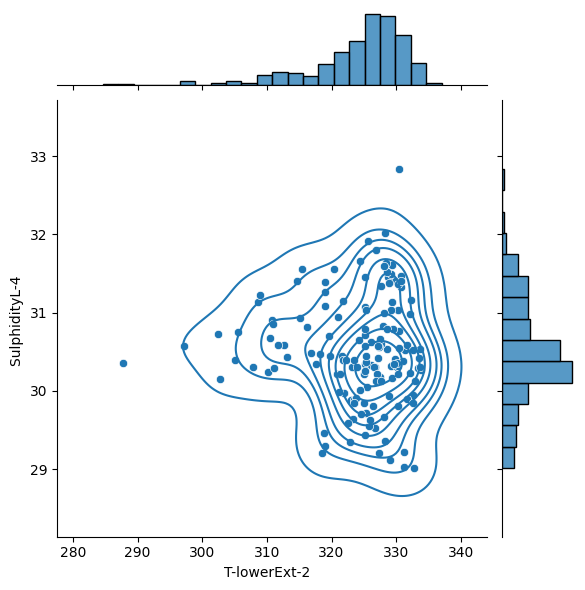

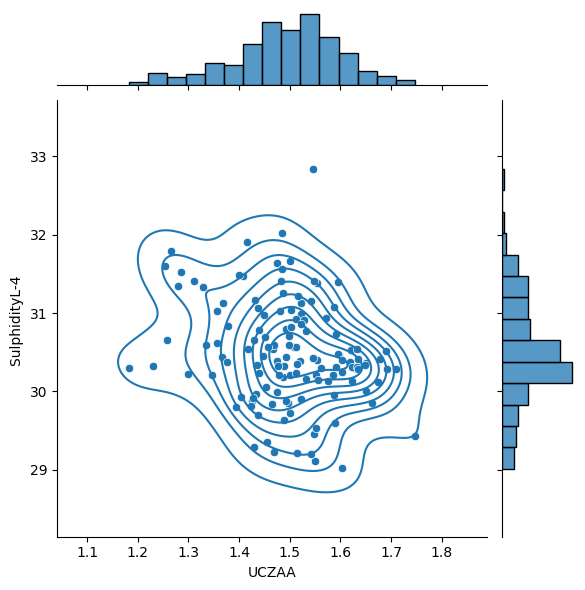

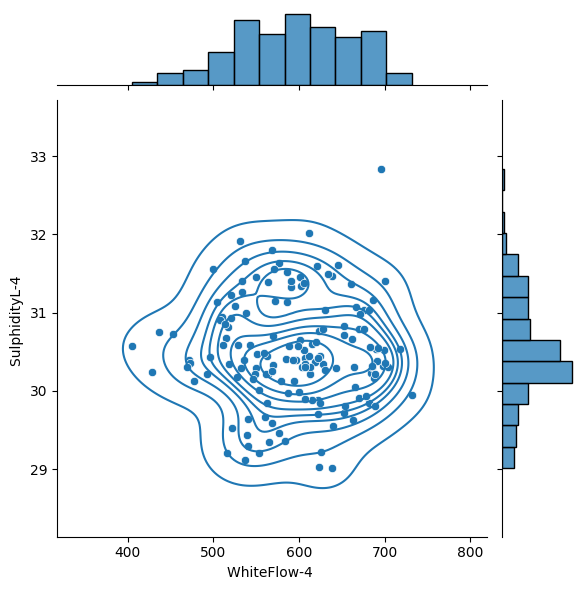

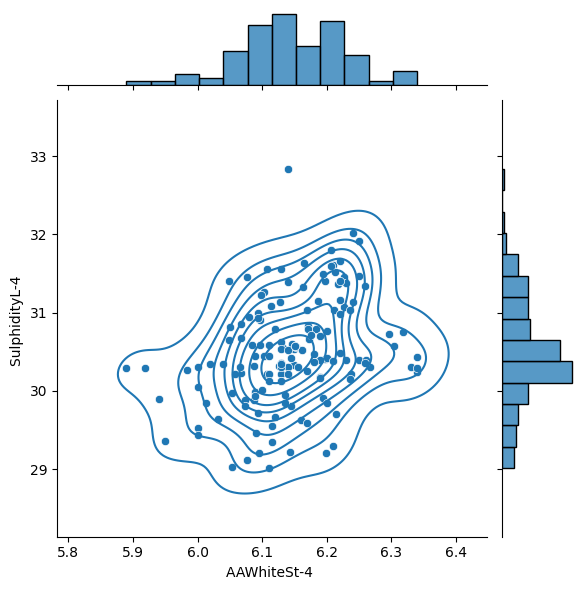

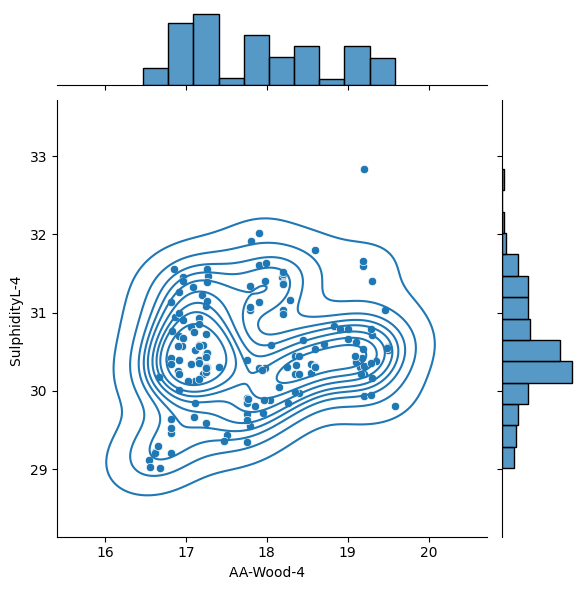

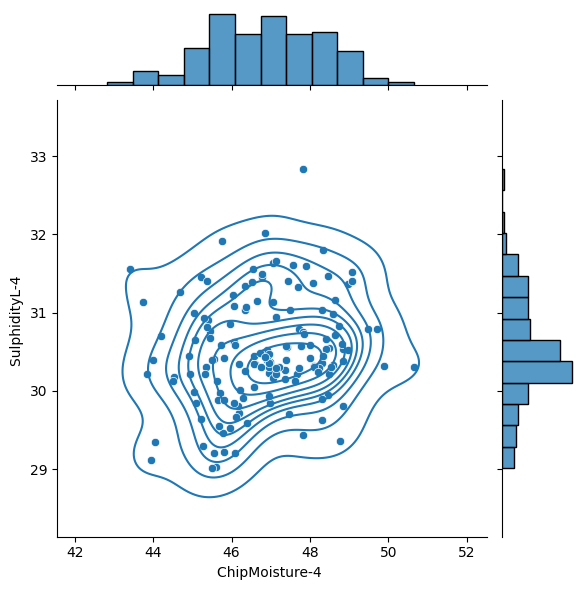

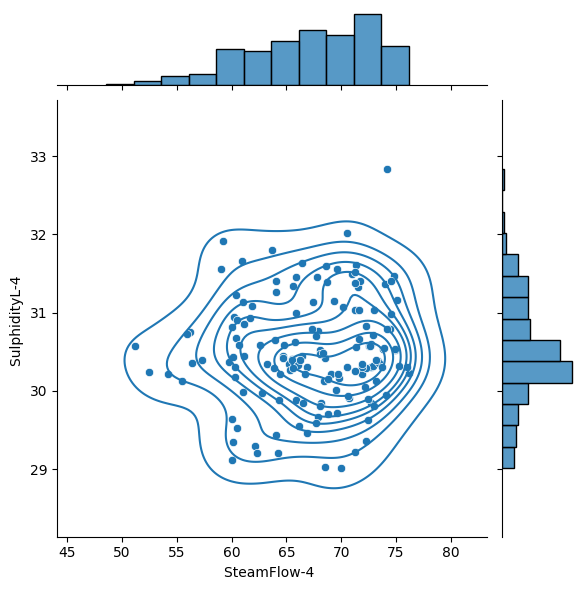

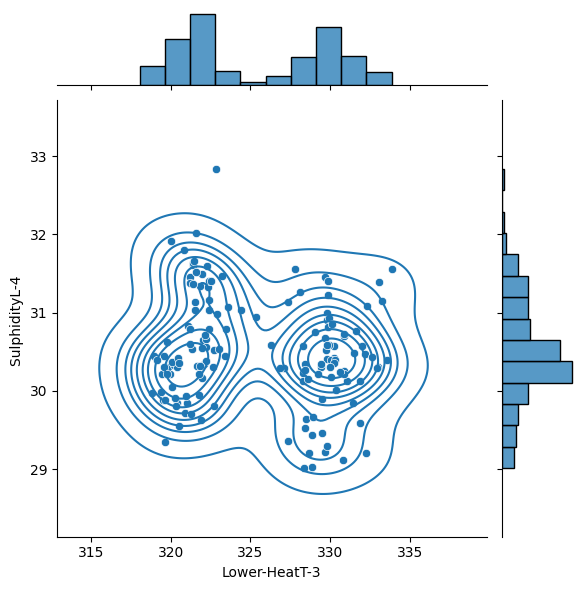

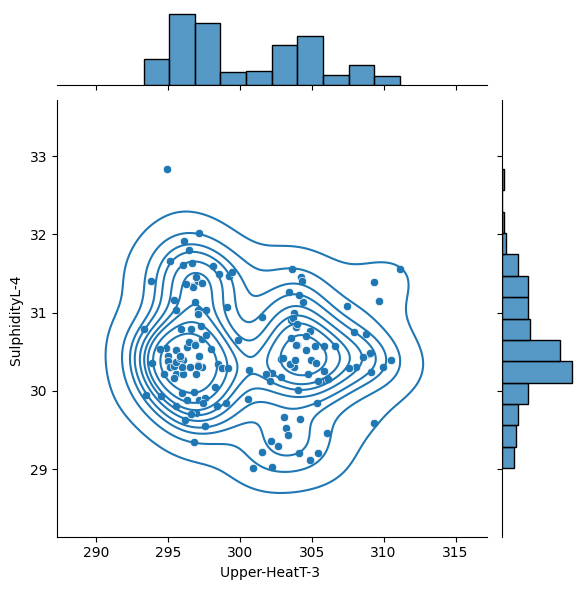

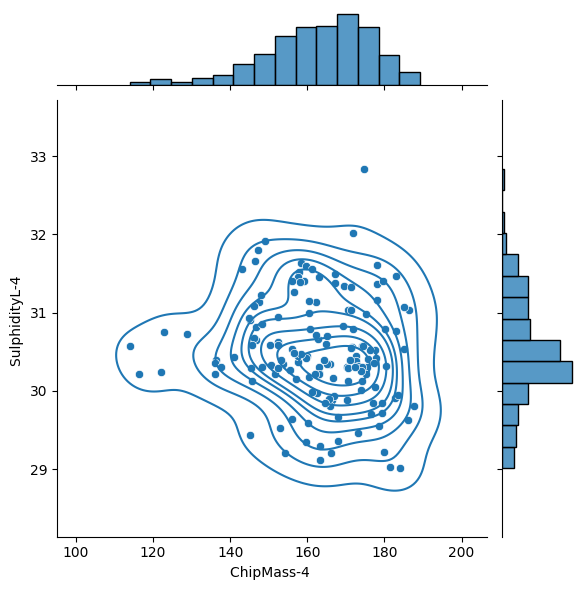

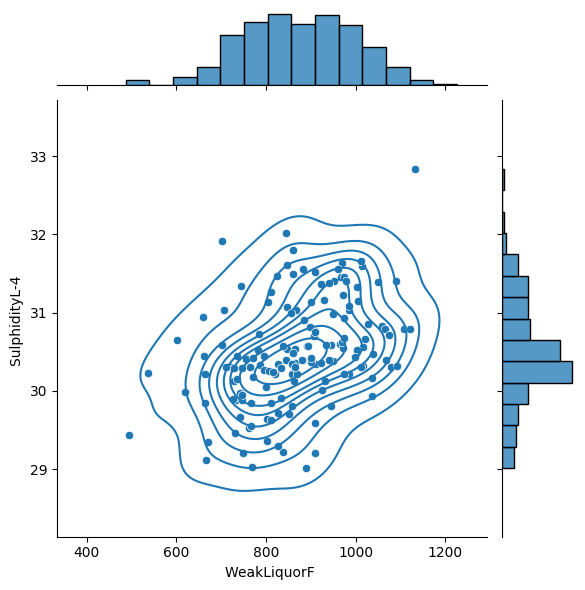

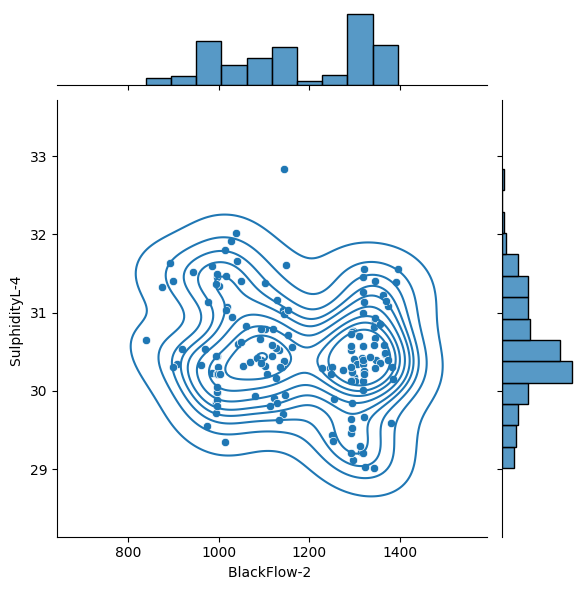

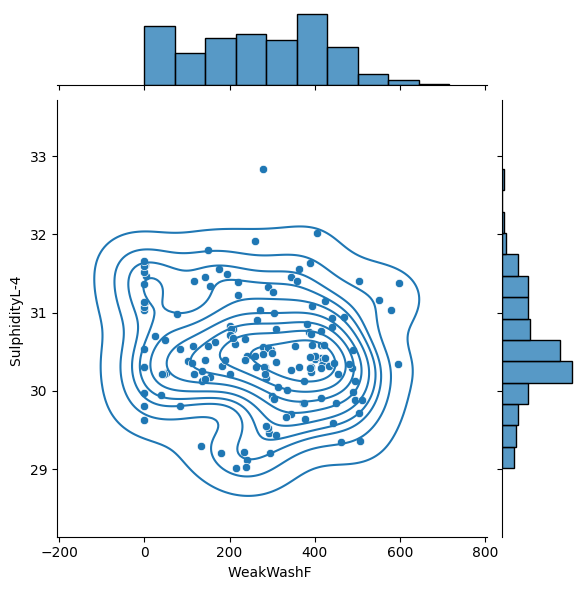

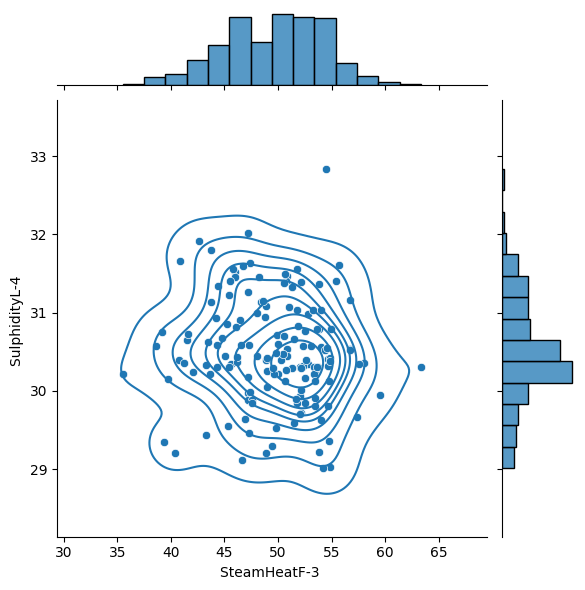

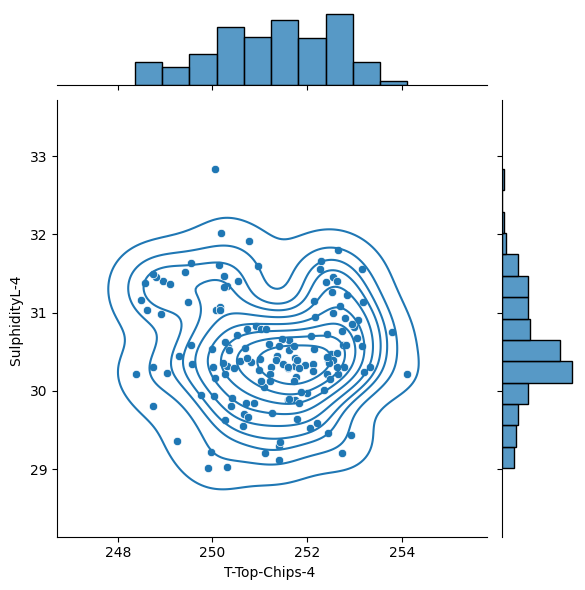

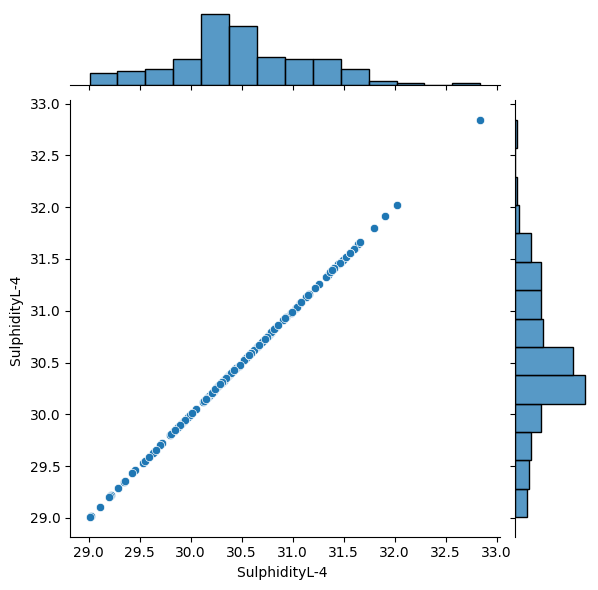

In [55]:
for col in df_s.columns:
    if col == 'Observation':
        pass
    else:    
        g = sns.jointplot(data = df_s, x= col, y = 'SulphidityL-4 ', kind = 'scatter')
        g = g.plot_joint(sns.kdeplot)

In [59]:
df_s['UCZAA'] = df_s['UCZAA'].fillna(df_s['UCZAA'].median())
df_s['AAWhiteSt-4 '] = df_s['AAWhiteSt-4 '].fillna(df_s['AAWhiteSt-4 '].mean())
df_s['SulphidityL-4 '] = df_s['SulphidityL-4 '].fillna(df_s['SulphidityL-4 '].mean())